# Yaw angle time-series generation from video frames using a pre-trained CNN Regressor

## Overview

This Jupyter notebook demonstrates how to load a pre-trained Convolutional Neural Network (CNN) regressor model and use it to predict the yaw angle from frames extracted from a video. The process involves splitting the video into frames at regular intervals, predicting the yaw value for each frame, and storing the results in a map structure.

## Steps Involved

### 1. Loading the Pre-trained Regressor Model
The notebook begins by loading a pre-trained CNN regressor model that has been specifically trained to predict the yaw angle from an image of a head.

### 2. Video Processing
- **Video Splitting**: The video file is split into individual frames. Frames are captured every 0.2 seconds, allowing for consistent sampling across the video.
- **Index Generation**: Each frame is assigned an index corresponding to the time in the video from which it was captured. This index is used to map each frame to its corresponding yaw prediction.

### 3. Yaw Prediction
For each frame extracted from the video:
- The pre-trained regressor model is used to predict the yaw angle.
- The predicted yaw value and the corresponding index are stored in a map structure.

### 4. Output
The final output of the notebook is a map where:
- **Key**: The index of the frame (based on the time in the video).
- **Value**: The predicted yaw angle for that frame.

This output map provides a comprehensive view of the yaw angle variations throughout the video, allowing for further analysis or visualization.

## Usage

To use this notebook:
1. Ensure that you have the pre-trained CNN regressor model available.
2. Provide the path to the video file you wish to process.
3. Run the notebook to generate the map of yaw predictions.

The map can then be used for various applications, such as detecting head rotations or analyzing the head pose throughout the video.


## Import the neccesary dependencies

In [28]:
from tensorflow.keras.models import load_model
import os
from PIL import Image

import subprocess
import os
import sys
import fnmatch

from tensorflow.keras.preprocessing.image import img_to_array, load_img
import numpy as np

import matplotlib.pyplot as plt

## Load the pretrained regressor model

In [33]:
model = load_model('../models/stable_yaw_angle_regressor.keras')

## Add some utility functions for image preprocessing

In [6]:
def resize_image(image, size=(128, 128)):
    return image.resize(size)

def getImage(directory, filename):
    file_path = os.path.join(directory, filename)

    if os.path.isfile(file_path):
        with Image.open(file_path) as img:
            img = resize_image(img)
            img_array = np.array(img, dtype=np.uint8)
            return img_array
        
def preprocess_image(image_path, target_size=(128, 128)):
    img = load_img(image_path, target_size=target_size)
    img_array = img_to_array(img) / 255.0
    img_array = img_array.astype(np.float32)
    img_array = np.expand_dims(img_array, axis=0)
    return img_array

def plot_preprocessed_image(preprocessed_image):
    if preprocessed_image.shape[0] == 1:
        img_to_plot = preprocessed_image[0]
    else:
        img_to_plot = preprocessed_image

    plt.imshow(img_to_plot)
    plt.axis('off')
    plt.show()

## Read the input video and split it into frames

In [16]:
def extract_frames_ffmpeg(video_path, output_folder, interval=0.2):
    if not os.path.exists(output_folder):
        os.makedirs(output_folder)

    fps = 1 / interval
    command = [
        'ffmpeg',
        '-i', video_path,
        '-vf', f'fps={fps}',
        os.path.join(output_folder, 'frame_%04d.jpg')
    ]

  
    subprocess.run(command, check=True)
    print(f"Frames extracted to {output_folder}")

def count_jpg_files(directory):
    count = 0
    for filename in os.listdir(directory):
        if fnmatch.fnmatch(filename, '*.jpg'):
            count += 1
    return count

In [36]:
video_input_path = 'video/face2.mp4'
output_frames_path = 'video/frames'
extract_frames_ffmpeg(video_input_path, output_frames_path)

ffmpeg version 5.1.2 Copyright (c) 2000-2022 the FFmpeg developers
  built with clang version 14.0.6
  configuration: --prefix=/Users/runner/miniforge3/conda-bld/ffmpeg_1674566267822/_h_env_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_pl --cc=arm64-apple-darwin20.0.0-clang --cxx=arm64-apple-darwin20.0.0-clang++ --nm=arm64-apple-darwin20.0.0-nm --ar=arm64-apple-darwin20.0.0-ar --disable-doc --disable-openssl --enable-demuxer=dash --enable-hardcoded-tables --enable-libfreetype --enable-libfontconfig --enable-libopenh264 --enable-cross-compile --arch=arm64 --target-os=darwin --cross-prefix=arm64-apple-darwin20.0.0- --host-cc=/Users/runner/miniforge3/conda-bld/ffmpeg_1674566267822/_build_env/bin/x86_64-apple-darwin13.4.0-clang --enable-neon --enable-gnutls --enable-libmp3lame --enable-libvpx --enable-pthreads --enable-gpl --enable-libx264 --enable

Frames extracted to video/frames


frame=   51 fps=0.0 q=24.8 Lsize=N/A time=00:00:10.20 bitrate=N/A speed=26.5x    
video:1774kB audio:0kB subtitle:0kB other streams:0kB global headers:0kB muxing overhead: unknown


## Infere yaw value predicted from the frames extracted from the video

In [37]:
predictions_map = {}
number_of_frames = count_jpg_files(output_frames_path)
starting_index = 0.2

for i in range(1, number_of_frames):
    if (i < 10):
        path = f'{output_frames_path}/frame_000{i}.jpg'
    else:
        path = f'{output_frames_path}/frame_00{i}.jpg'
    
    preprocessed_image = preprocess_image(path)
    yaw_prediction = model.predict(preprocessed_image)
    
    index = starting_index * i
    predictions_map[index] = yaw_prediction[0][0]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 122ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
1/1 ━━━━━━━

## Plot the predictions map
It should show a sinusoidal-ish graph, since the video has a person rorating their face from one side to the other

{0.2: 3.656726, 0.4: 3.1144602, 0.6000000000000001: 3.546911, 0.8: 3.6577039, 1.0: 11.964856, 1.2000000000000002: 17.873423, 1.4000000000000001: 18.166483, 1.6: 18.349371, 1.8: 19.971073, 2.0: 16.77458, 2.2: 21.979391, 2.4000000000000004: 19.965542, 2.6: 19.677303, 2.8000000000000003: 6.381784, 3.0: 9.820981, 3.2: 8.400116, 3.4000000000000004: 8.426596, 3.6: 6.2372966, 3.8000000000000003: 7.950895, 4.0: 6.4219823, 4.2: 6.394048, 4.4: 5.8880568, 4.6000000000000005: 5.868197, 4.800000000000001: 6.2909064, 5.0: 1.6750643, 5.2: 7.3736625, 5.4: 17.891846, 5.6000000000000005: 19.232447, 5.800000000000001: 22.017963, 6.0: 17.674093, 6.2: 16.985455, 6.4: 16.376997, 6.6000000000000005: 16.396362, 6.800000000000001: 16.338333, 7.0: 17.114092, 7.2: 8.680025, 7.4: 9.172808, 7.6000000000000005: 9.178544, 7.800000000000001: 7.429461, 8.0: 8.059247, 8.200000000000001: 7.59325, 8.4: 8.45055, 8.6: 8.174861, 8.8: 8.502427, 9.0: 8.41412, 9.200000000000001: 4.6104126, 9.4: 1.7861786, 9.600000000000001: 4.

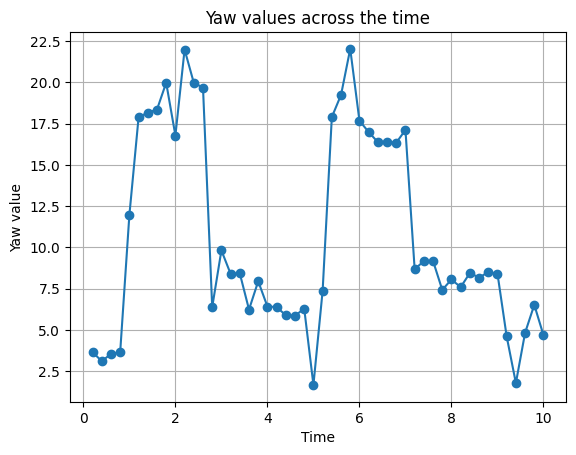

In [38]:
x = list(predictions_map.keys())
y = list(predictions_map.values())

print(predictions_map)

plt.plot(x, y, marker='o')
plt.xlabel('Time')
plt.ylabel('Yaw value')
plt.title('Yaw values across the time')
plt.grid(True)
plt.show()